# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [3]:
X, y = generate_dataset()

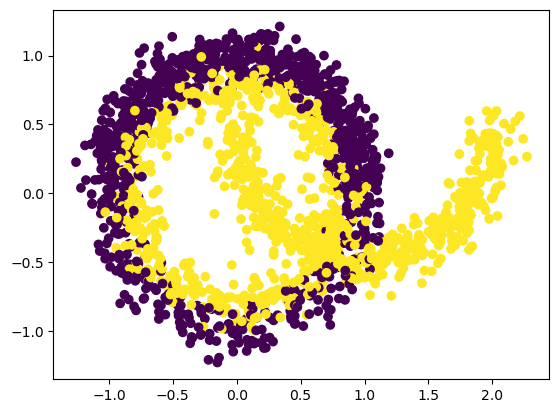

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
y.value_counts()

1    1000
0    1000
Name: y, dtype: int64

In [6]:
print(X)

[[-0.61174071  0.58558597]
 [ 2.24150816  0.3956499 ]
 [ 0.95240139  0.68962855]
 ...
 [ 0.38398217  0.84368705]
 [ 0.05452013  0.32870687]
 [ 0.71841288  0.71544324]]


In [7]:
print(y)

0       1
1       1
2       0
3       1
4       0
       ..
1995    1
1996    0
1997    0
1998    1
1999    0
Name: y, Length: 2000, dtype: int64


(array([1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

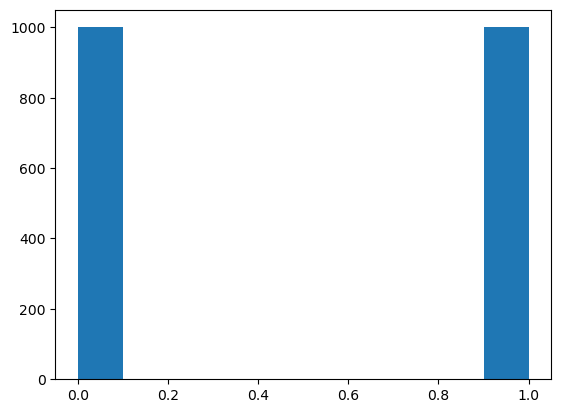

In [16]:
plt.hist(y)

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [9]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


randomforest_model = RandomForestClassifier(n_estimators=50, random_state=100)
randomforest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=100)

In [10]:

bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=100)
bagging.fit(X_train, y_train)

boosting = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=100)
boosting.fit(X_train, y_train)

C:\Users\RESHMA CHOWDARY\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\RESHMA CHOWDARY\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(), random_state=100)

In [11]:
randomforest_pred = randomforest_model.predict(X_test)
bagging_pred = bagging.predict(X_test)
boosting_pred = boosting.predict(X_test)

randomforest_accuracy = accuracy_score(y_test,randomforest_pred)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
boosting_accuracy = accuracy_score(y_test, boosting_pred)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


randomforest_accuracy = accuracy_score(y_test, randomforest_pred)
randomforest_precision = precision_score(y_test, randomforest_pred)
randomforest_recall = recall_score(y_test, randomforest_pred)

print(" Accuracy for Random Forest :", randomforest_accuracy)
print("Precision for Random Forest :", randomforest_precision)
print(" Recall for Random Forest :", randomforest_recall)


 Accuracy for Random Forest : 0.86
Precision for Random Forest : 0.8697916666666666
 Recall for Random Forest : 0.8434343434343434


In [13]:


boosting_accuracy = accuracy_score(y_test, boosting_pred)
boosting_precision = precision_score(y_test, boosting_pred)
boosting_recall = recall_score(y_test, boosting_pred)

print(" Accuracy for Boosting:", boosting_accuracy)
print(" Precision for Boosting:", boosting_precision)
print("Recall for Boosting:", boosting_recall)


 Accuracy for Boosting: 0.85
 Precision for Boosting: 0.875
Recall for Boosting: 0.8131313131313131


In [14]:



bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred)
bagging_recall = recall_score(y_test, bagging_pred)

print(" Accuracy for Bagging:", bagging_accuracy)
print("Precision for Bagging:", bagging_precision)
print(" Recallfor Bagging:", bagging_recall)


 Accuracy for Bagging: 0.8625
Precision for Bagging: 0.8864864864864865
 Recallfor Bagging: 0.8282828282828283


In [15]:

print("Random Forest Accuracy:", randomforest_accuracy)
print("Bagging Accuracy:", bagging_accuracy)
print("Boosting Accuracy:", boosting_accuracy)


Random Forest Accuracy: 0.86
Bagging Accuracy: 0.8625
Boosting Accuracy: 0.85


Here it is observed that bagging and boosting achieved slightly higher accuracy when random forest is used as a base estimator compased to randomforest alone.

so we can say that ensembing methods can enhance model performance.